In [ ]:
import tensorflow as tf

#1 .创建输入张量
a = tf.constant(2.)
b = tf.constant(4.)

#2. 直接计算并打印
print('a+b=',a+b)

In [7]:
import tensorflow as tf
import numpy as np
import timeit

#创建在CPU上运算的2个矩阵
with tf.device('/cpu:0'):
    cpu_a=tf.random.normal([1,10])
    cpu_b=tf.random.normal([10,1])
    print(cpu_a.device,cpu_b.device)
#创建使用GPU运算的两个矩阵
with tf.device('/gpu:0'):
    gpu_a=tf.random.normal([1,10])
    gpu_b=tf.random.normal([10,1])
    print(gpu_a.device,gpu_b.device)

def cpu_run():
    with tf.device('/cpu:0'):
        c = tf.matmul(cpu_a,cpu_b)
    return c

def gpu_run():
    with tf.device('/gpu:0'):
        c = tf.matmul(gpu_a,gpu_b)
    return c

#第一次计算需要热身，避免将初始化阶段时间结算在内
cpu_time = timeit.timeit(cpu_run,number=10)
gpu_time = timeit.timeit(gpu_run,number=10)
print('waimup:',cpu_time,gpu_time)
#正式计算十次，取平均时间
cpu_time = timeit.timeit(cpu_run,number = 10)
gpu_time = timeit.timeit(gpu_run,number = 10)
print('run time:',cpu_time,gpu_time)

/job:localhost/replica:0/task:0/device:CPU:0 /job:localhost/replica:0/task:0/device:CPU:0
/job:localhost/replica:0/task:0/device:CPU:0 /job:localhost/replica:0/task:0/device:CPU:0
waimup: 0.0012641000000002123 0.00039330000000603604
run time: 0.0007425000000012005 0.00032260000000405853


In [9]:
import tensorflow as tf
from numpy import float32

#创建4个张量
a = tf.constant(1.)
b = tf.constant(2.)
c = tf.constant(3.)
w= tf.constant(4.)

with tf.GradientTape() as tape:  # 构建梯度环境
    tape.watch([w])  # 将w加入梯度跟踪列表
    # 构建计算过程
    y= a*w**2+b*w+c
# 求导
[dy_dw] = tape.gradient(y,[w])
print(dy_dw)  # 打印出导数
tf.Tensor(10.0,shape=(1),dtype=float32)

tf.Tensor(10.0, shape=(), dtype=float32)


TypeError: __init__() got an unexpected keyword argument 'shape'

In [4]:
import keras
import numpy as np 
import matplotlib.pyplot as plt
# sequrential按顺序构成的模型
from keras.models import Sequential
# Dense全连接层
from keras.layers import Dense

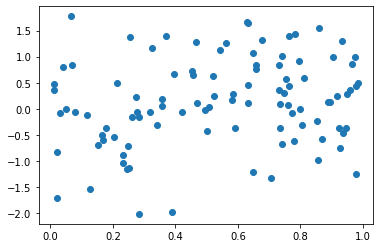

In [5]:
#使用numpy生成100个随机点
x_data = np.random.rand(100)
noise = np.random.normal(0,1.01,x_data.shape)
y_data = x_data*0.1+ 0.2 + noise

# 显示随机点
plt.scatter(x_data,y_data)
plt.show()

cost: 0.7309870719909668
cost: 0.6756536960601807
cost: 0.6704288721084595
cost: 0.6690817475318909
cost: 0.6687344312667847
cost: 0.6686448454856873
cost: 0.6686217784881592
W [[0.5534455]] b: [-0.17064539]


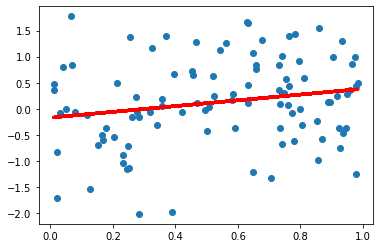

In [10]:
# 构建一个顺序模型
model = Sequential()
# 在模型中添加一个全连接层
model.add(Dense(units=1,input_dim=1))
#sgd:Stochastic gradient descent,随机梯度下降法
#mse:Mean Squared Error ,均方误差
model.compile(optimizer='sgd',loss = 'mse')

#训练3001个批次
for step in range(3001):
    # 每次训练一个批次
    cost = model.train_on_batch(x_data,y_data)
    # 每500个batch打印一次cost值
    if step%500==0:
        print('cost:',cost)

# 打印权值和偏执值
W,b= model.layers[0].get_weights()
print('W',W,'b:',b)

#x_data输入网络中，得到预测值y_pred
y_pred=model.predict(x_data)

#显示随机点
plt.scatter(x_data,y_data)
# 显示预测结果
plt.plot(x_data,y_pred,'r-',lw=3)
plt.show()


In [12]:
import keras 
import numpy as np
import matplotlib.pyplot as plt
#Sequrential按顺序构成的模型
from keras.models import Sequential
# Dense全连接层
from keras.layers import Dense,Activation
from keras.optimizers import SGD

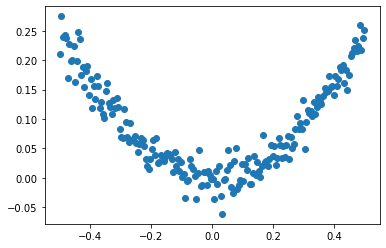

In [14]:
# 使用numpy生成200个随机点
x_data = np.linspace(-0.5,0.5,200)
noise = np.random.normal(0,0.02,x_data.shape)
y_data = np.square(x_data)+noise

#显示随机点
plt.scatter(x_data,y_data)
plt.show()

cost: 0.010713103227317333
cost: 0.0005370508297346532
cost: 0.00047143117990344763
cost: 0.00046682485844939947
cost: 0.00046604048111476004
cost: 0.0004659745027311146
cost: 0.00046597025357186794


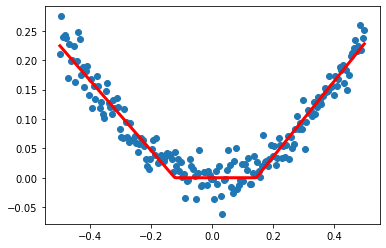

In [18]:
# 构建一个顺序模型
model = Sequential()
# 在模型中添加一个全连接层
# 1-10-1
model.add(Dense(units=10,input_dim=1,activation='relu'))
#model.add(Activation('tanh'))
model.add(Dense(units=1,activation='relu'))
#model.addd(Activation('tanh'))
#定义优化算法
sgd = SGD(lr=0.3)
#sgd:Stochastic gradient descent，随机梯度下降法
#mse:Mean Squared Erroe 均方误差
model.compile(optimizer = sgd,loss='mse')
          
#训练3001个批次
for step in range(3001):
    #每次训练一个批次
    cost = model.train_on_batch(x_data,y_data)
    #每500个batch打印一次cost值
    if step % 500 == 0 :
        print('cost:',cost)

#x_data输入网络中，得到预测值y_pred
y_pred=model.predict(x_data)

#显示随机点
plt.scatter(x_data,y_data)
#显示预测结果
plt.plot(x_data,y_pred,'r-',lw=3)
plt.show()

In [20]:
import numpy as np
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD

In [24]:
# 载入数据
(x_train,y_train),(x_test,y_test) = mnist.load_data("C:\ProgramData\Anaconda3\envs\OpenCv\Lib\site-packages\keras\datasets\mnist.npz")
# (60000,28,28)
print('x_shape:',x_train.shape)
# (60000)
print('y_shape:',y_train.shape)
# (60000,28,28)->(60000,784)
x_train = x_train.reshape(x_train.shape[0],-1)/255.0
x_test = x_test.reshape(x_test.shape[0],-1)/255.0
# 换 ont hot 格式
y_train = np_utils.to_categorical(y_train,num_classes=10)
y_test = np_utils.to_categorical(y_test,num_classes=10)

# 创建模型，输入784个神经元，输出10个神经元
model = Sequential([
    Dense(units=10,input_dim=784,bias_initializer='one',activation='softmax')])

# 定义优化器
sgd = SGD(lr=0.2)

# 定义优化器，loss function,训练过程中计算准确率
model.compile(
    optimizer=sgd,
    loss='mse',
    metrics=['accuracy'],
)

# 训练模型
model.fit(x_train,y_train,batch_size=32,epochs=10)

# 评估模型
loss,accuracy = model.evaluate(x_test,y_test)

print('\ntest loss',loss)
print('accuracy',accuracy)


x_shape: (60000, 28, 28)
y_shape: (60000,)
Epoch 1/10
1875/1875 [==============================] - 1s 512us/step - loss: 0.0533 - accuracy: 0.6504
Epoch 2/10
1875/1875 [==============================] - 1s 502us/step - loss: 0.0212 - accuracy: 0.8789
Epoch 3/10
1875/1875 [==============================] - 1s 504us/step - loss: 0.0181 - accuracy: 0.8911
Epoch 4/10
1875/1875 [==============================] - 1s 507us/step - loss: 0.0164 - accuracy: 0.9003
Epoch 5/10
1875/1875 [==============================] - 1s 513us/step - loss: 0.0160 - accuracy: 0.9004
Epoch 6/10
1875/1875 [==============================] - 1s 518us/step - loss: 0.0150 - accuracy: 0.90700s - loss: 0.0150 - accuracy: 
Epoch 7/10
1875/1875 [==============================] - 1s 536us/step - loss: 0.0148 - accuracy: 0.9078
Epoch 8/10
1875/1875 [==============================] - 1s 525us/step - loss: 0.0144 - accuracy: 0.9103
Epoch 9/10
1875/1875 [==============================] - 1s 533us/step - loss: 0.0139 - accuracy

Dropout应用

In [10]:
import numpy as np
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.optimizers import SGD


In [21]:
# 载入数据
(x_train,y_train),(x_test,y_test) = mnist.load_data("C:\ProgramData\Anaconda3\envs\OpenCv\Lib\site-packages\keras\datasets\mnist.npz")
# (60000,28,28)
print('x_shape:',x_train.shape)
# (60000)
print('y_shape:',y_train.shape)
# （60000，28，28）-> （60000，784）
x_train = x_train.reshape(x_train.shape[0],-1)/255.0
x_test = x_test.reshape(x_test.shape[0],-1)/255.0
# 换 one hot 格式
y_train = np_utils.to_categorical(y_train,num_classes=10)
y_test = np_utils.to_categorical(y_test,num_classes=10)

#创建模型
model = Sequential([
    Dense(units=200,input_dim =784,bias_initializer='one',activation='tanh'),
    Dropout(0.4),
    Dense(units=100,bias_initializer='one',activation='tanh'),
    Dropout(0.4),
    Dense(units=10,bias_initializer='one',activation='softmax')
])

# 定义优化器
sgd = SGD(lr=0.2)

# 定义优化器，loss function,训练过程中计算准确率
model.compile(
    optimizer = sgd,
    loss = 'categorical_crossentropy',
    metrics = ['accuracy'],
)

#训练模型
model.fit(x_train,y_train,batch_size=32,epochs=10)

#评估模型
loss,accuracy = model.evaluate(x_test,y_test)
print('\ntest loss',loss)
print('test accuracy',accuracy)

x_shape: (60000, 28, 28)
y_shape: (60000,)
Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.6726 - accuracy: 0.7937
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3010 - accuracy: 0.9091
Epoch 3/10
1875/1875 [==============================] - 2s 959us/step - loss: 0.2565 - accuracy: 0.9224
Epoch 4/10
1875/1875 [==============================] - 2s 895us/step - loss: 0.2169 - accuracy: 0.9351
Epoch 5/10
1875/1875 [==============================] - 2s 925us/step - loss: 0.1991 - accuracy: 0.9403
Epoch 6/10
1875/1875 [==============================] - 2s 912us/step - loss: 0.1830 - accuracy: 0.9444
Epoch 7/10
1875/1875 [==============================] - 2s 891us/step - loss: 0.1800 - accuracy: 0.9461
Epoch 8/10
1875/1875 [==============================] - 2s 921us/step - loss: 0.1687 - accuracy: 0.9496
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1629 - accuracy: 0.9520
Epoch 10/10
313/313 [======

CNN应用于手写数字识别

In [3]:
import numpy as np
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense,Dropout,Convolution2D,MaxPooling2D,Flatten
from keras.optimizers import Adam

In [6]:
# 载入数据
(x_train,y_train),(x_test,y_test) = mnist.load_data("C:\ProgramData\Anaconda3\envs\OpenCv\Lib\site-packages\keras\datasets\mnist.npz")
# (60000,28,28)->(60000,28,28,1)
x_train = x_train.reshape(-1,28,28,1)/255.0
x_test = x_test.reshape(-1,28,28,1)/255.0
# 换one hot 格式
y_train = np_utils.to_categorical(y_train,num_classes=10)
y_test = np_utils.to_categorical(y_test,num_classes=10)

#定义顺序模型
model = Sequential()

# 第一个卷积层
# input_shape 输入平面
# filters 卷积核/滤波器个数
# kernel_size 卷积窗口大小
# strides 步长
# padding padding方式 same/valid
# activation 激活函数
model.add(Convolution2D(
    input_shape = (28,28,1),
    filters = 32,
    kernel_size = 5,
    strides = 1,
    padding = 'same',
    activation = 'relu',
))
# 第二个卷积层
model.add(Convolution2D(64,5,strides=1,padding='same',activation='relu'))
#第二个池化层
model.add(MaxPooling2D(2,2,'same'))
# 把第二个池化层的输出扁平化为1维
model.add(Flatten())
# 第一个全连接层
model.add(Dense(1024,activation = 'relu'))
# Dropout
model.add(Dropout(0.5))
# 第二个全连接层
model.add(Dense(10,activation='softmax'))

# 定义优化器
adam = Adam(lr=1e-4)

#定义优化器，loss function,训练过程中计算准确率
model.compile(optimizer=adam,loss='categorical_crossentropy',metrics=['accuracy'])

#训练模型
model.fit(x_train,y_train,batch_size=64,epochs=10)

#评估模型
loss,accuracy = model.evaluate(x_test,y_test)

print('test loss',loss)
print('test accuracy',accuracy)

Epoch 1/10
938/938 [==============================] - 176s 187ms/step - loss: 0.5059 - accuracy: 0.8536
Epoch 2/10
938/938 [==============================] - 174s 186ms/step - loss: 0.0765 - accuracy: 0.9769
Epoch 3/10
938/938 [==============================] - 176s 187ms/step - loss: 0.0476 - accuracy: 0.9852
Epoch 4/10
938/938 [==============================] - 180s 192ms/step - loss: 0.0374 - accuracy: 0.9884
Epoch 5/10
938/938 [==============================] - 184s 197ms/step - loss: 0.0309 - accuracy: 0.9903
Epoch 6/10
938/938 [==============================] - 183s 195ms/step - loss: 0.0253 - accuracy: 0.9916
Epoch 7/10
938/938 [==============================] - 174s 185ms/step - loss: 0.0216 - accuracy: 0.9930
Epoch 8/10
938/938 [==============================] - 179s 191ms/step - loss: 0.0167 - accuracy: 0.9949
Epoch 9/10
938/938 [==============================] - 173s 184ms/step - loss: 0.0162 - accuracy: 0.9951
Epoch 10/10
313/313 [==============================] - 7s 23ms/s

In [1]:
import numpy as np
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense
from keras.layers.recurrent import SimpleRNN
from keras.optimizers import Adam

In [10]:
# 数据长度一行有28个像素
input_size = 28
# 序列长度一共有28行
time_steps = 28
# 隐藏层cell个数
cell_size = 50

# 载入数据
(x_train,y_train),(x_test,y_test) = mnist.load_data("C:\ProgramData\Anaconda3\envs\OpenCv\Lib\site-packages\keras\datasets\mnist.npz")
# (60000,28,28)->(60000,28,28,1)
x_train = x_train/255.0
x_test = x_test/255.0
# 换one hot 格式
y_train = np_utils.to_categorical(y_train,num_classes=10)
y_test = np_utils.to_categorical(y_test,num_classes=10)

#定义顺序模型
model = Sequential()

# 循环神经网络
model.add(SimpleRNN(units=cell_size,input_shape = (time_steps,input_size)))

#输出层
model.add(Dense(10,activation = 'softmax'))

#定义优化器
adam = Adam(lr=1e-4)

#定义优化器，loss functionm,训练过程中计算准确率
model.compile(optimizer = adam,loss='categorical_crossentropy',metrics= ['accuracy'])

#训练模型
model.fit(x_train,y_train,batch_size=64,epochs=10)

#评估模型、
loss,accuracy=model.evaluate(x_test,y_test)

print('test loss',loss)
print('test accuracy',accuracy)

Epoch 1/10
938/938 [==============================] - 3s 3ms/step - loss: 1.9117 - accuracy: 0.3366
Epoch 2/10
938/938 [==============================] - 2s 2ms/step - loss: 0.9891 - accuracy: 0.7013
Epoch 3/10
938/938 [==============================] - 2s 2ms/step - loss: 0.7653 - accuracy: 0.7637
Epoch 4/10
938/938 [==============================] - 2s 2ms/step - loss: 0.6540 - accuracy: 0.8014
Epoch 5/10
938/938 [==============================] - 2s 2ms/step - loss: 0.5878 - accuracy: 0.8205
Epoch 6/10
938/938 [==============================] - 2s 3ms/step - loss: 0.5358 - accuracy: 0.8386
Epoch 7/10
938/938 [==============================] - 2s 2ms/step - loss: 0.4954 - accuracy: 0.8529
Epoch 8/10
938/938 [==============================] - 2s 2ms/step - loss: 0.4632 - accuracy: 0.8620
Epoch 9/10
938/938 [==============================] - 2s 2ms/step - loss: 0.4319 - accuracy: 0.8721
Epoch 10/10
313/313 [==============================] - 0s 1ms/step - loss: 0.4034 - accuracy: 0.8849